<a href="https://colab.research.google.com/github/Baeltor/PCD/blob/main/NotebooksMLII/Redes_neuronales_multicapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

Modelos de redes simples (multi-perceptrón): estos modelos se caracterizan por tener arquitecturas relativamente sencillas por lo que los requerimientos computacionales no son elevados y no es necesario el uso el uso de GPUs. Dentro de este grupo destacan las implementaciones de Scikit-learn y H2O

Deep learning: son modelos más complejos (redes convolucionales, redes recurrentes, LSTM...) cuyos requerimientos computacionales hacen necesario el uso de GPUs. Para este tipo de modelos se tiene que recurrir a frameworks especializados para como Tensorflow-Keras o Pytorch.

Los ejemplos de este documento se corresponden con el primer caso de uso, por lo que se utiliza la librería Scikit-learn para crear los modelos.


## Redes neuronales


## Estructura de la red


Las redes neuronales son modelos creados al ordenar operaciones matemáticas siguiendo una determinada estructura. La forma más común de representar la estructura de una red neuronal es mediante el uso de capas (layers), formadas a su vez por neuronas (unidades, units o neurons). Cada neurona, realiza una operación sencilla y está conectada a las neuronas de la capa anterior y de la capa siguiente mediante pesos, cuya función es regular la información que se propaga de una neurona a otra.

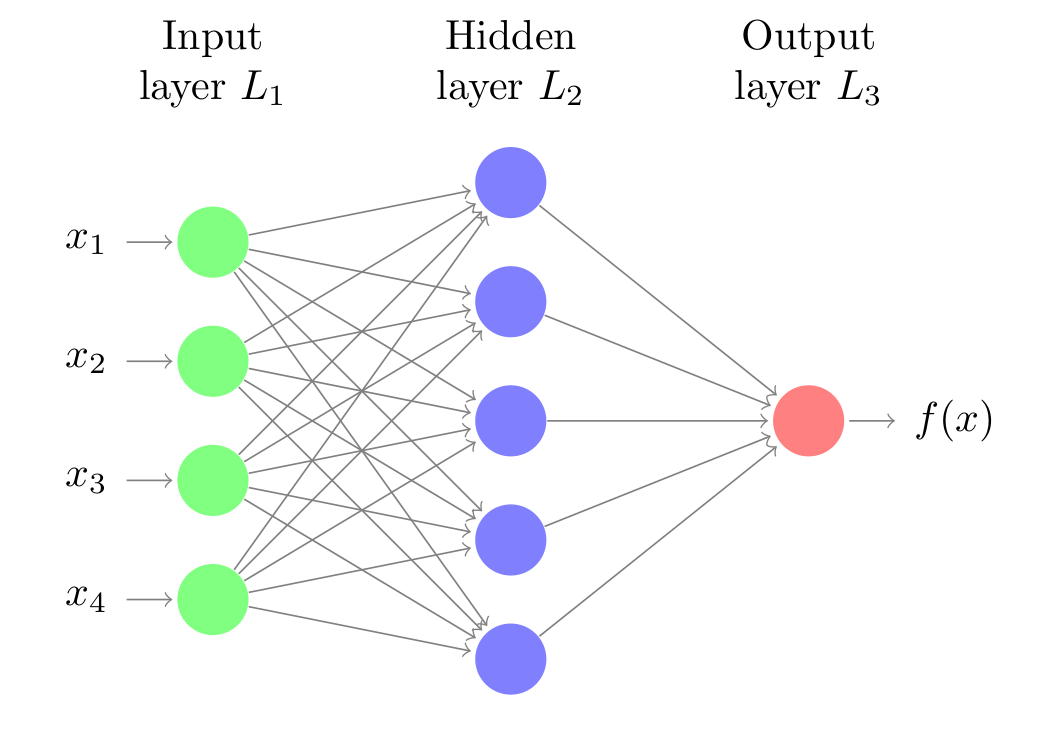

Para facilitar la comprensión de la estructura de las redes, es útil representar una red equivalente a un modelo de regresión lineal.

$$y = w_1 x_1 + ... + w_d x_d + b$$

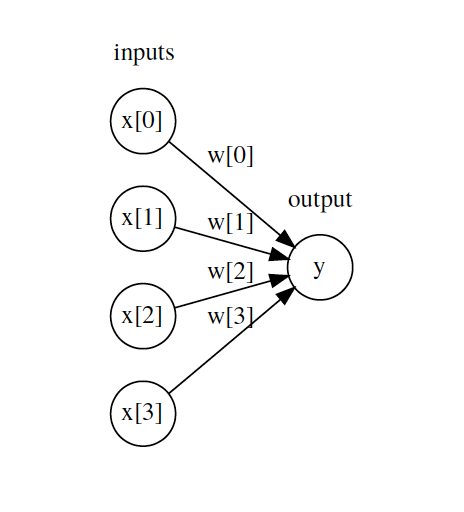

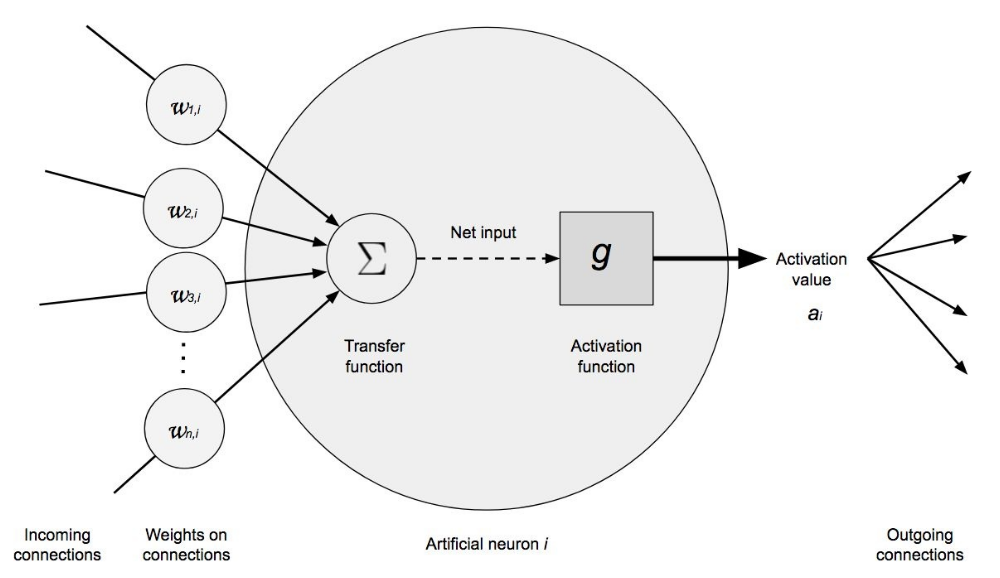

La anterior ha sido una explicación intuitiva del funcionamiento de una neurona. Véase ahora una definición más matemática.

El valor neto de entrada a una neurona es la suma de los valores que le llegan, ponderados por el peso de las conexiones, más el bias.

$$entrada = \sum^n_{i=1} x_i w_i + b$$
En lugar de utilizando el sumatorio, esta operación suele representarse como el producto matricial, donde $\textbf{X}$ representa el vector de los valores de entrada y $\textbf{W}$ el vector de pesos.

$$entrada = \textbf{X}\textbf{W} + b$$
A este valor se le aplica una función de activación ($g$) que lo transforma en lo que se conoce como valor de activación ($a$), que es lo que finalmente sale de la neurona.

$$a = g(entrada) = g(\textbf{X}\textbf{W} + b)$$
Para la capa de entrada, donde únicamente se quiere incorporar el valor de los predictores, la función de activación es la unidad, es decir, sale lo mismo que entra. En la capa de salida, la función de activación utilizada suele ser la identidad para problemas de regresión y soft max para clasificación.


### Rectified linear unit (ReLU)

$$\operatorname{ReLU}(x) = \max(x, 0)$$

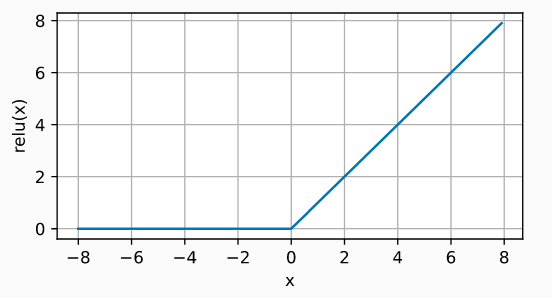


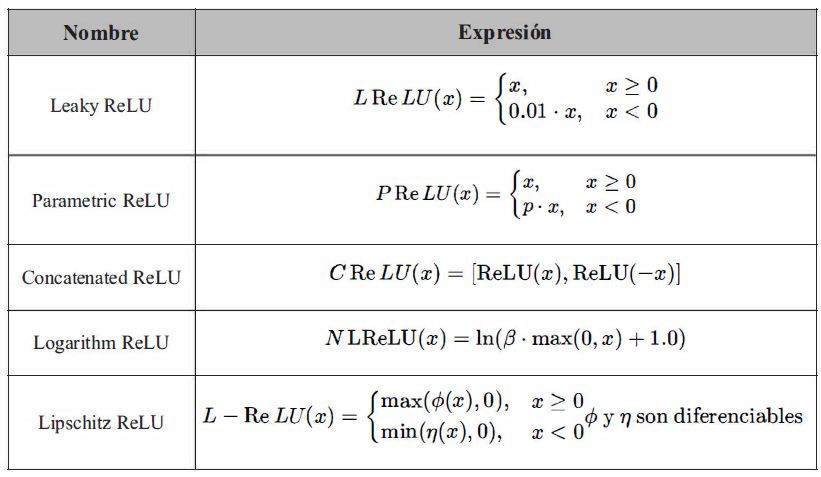

Sigmoide

La función sigmoide transforma valores en el rango de (-inf, +inf) a valores en el rango (0, 1).

$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}$$

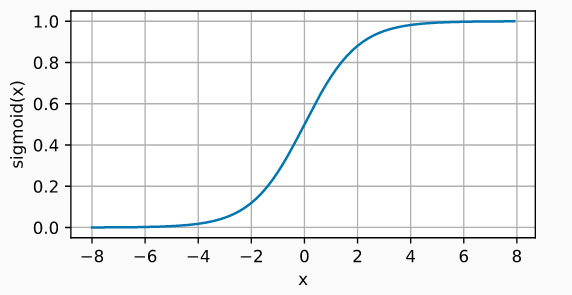

Tangente hiperbólica (Tanh)

La función de activación Tanh, se comporta de forma similar a la función sigmoide, pero su salida está acotada en el rango (-1, 1).

$$\operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}$$

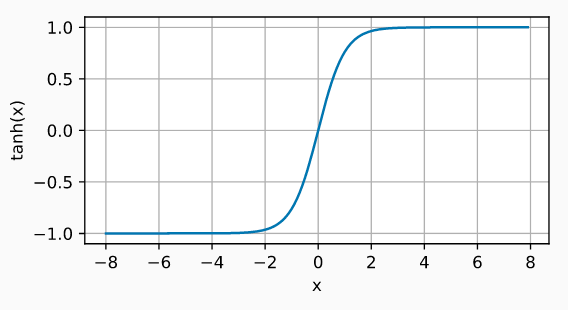

## Función de coste (loss function)


La función de coste ($l$), también llamada función de pérdida, loss function o cost function, es la encargada de cuantificar la distancia entre el valor real y el valor predicho por la red, en otras palabras, mide cuánto se equivoca la red al realizar predicciones. En la mayoría de casos, la función de coste devuelve valores positivos. Cuanto más próximo a cero es el valor de coste, mejor son las predicciones de la red (menor error), siendo cero cuando las predicciones se corresponden exactamente con el valor real.

La función de coste puede calcularse para una única observación o para un conjunto de datos (normalmente promediando el valor de todas las observaciones). El segundo caso, es el que se utiliza para dirigir el entrenamiento de los modelos.

Dependiendo del tipo de problema, regresión o clasificación, es necesario utilizar una función de coste u otra. En problemas de regresión, las más utilizadas son el error cuadrático medio y el error absoluto medio. En problemas de clasificación suele emplearse la función log loss, también llamada logistic loss o cross-entropy loss.


## Error cuadrático medio

El error cuadrático medio (mean squared error, MSE) es con diferencia la función de coste más utilizada en problemas de regresión. Para una determinada observación $i$, el error cuadrático se calcula como la diferencia al cuadrado entre el valor predicho $\hat{y}$ y el valor real $y$.

$$l^{(i)}(\mathbf{w}, b) = \left(\hat{y}^{(i)} - y^{(i)}\right)^2$$
Las funciones de coste suelen escribirse con la notación $l(\mathbf{w}, b)$ para hacer referencia a que su valor depende de los pesos y bias del modelo, ya que son estos los que determinan el valor de las predicciones $y^{(i)}$.

Con frecuencia, esta función de coste se encuentra multiplicada por $\frac{1}{2}$, esto es simplemente por conveniencia matemática para simplificar el cálculo de su derivada.

$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2$$
Para cuantificar el error que comete el modelo todo un conjunto de datos, por ejemplo los de entrenamiento, simplemente se promedia el error de todas las $N$ observaciones.

$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^n \left(\hat{y}^{(i)} - y^{(i)}\right)^2$$
Cuando un modelo se entrena utilizando el error cuadrático medio como función de coste, está aprendiendo a predecir la media de la variable respuesta.




## Error medio absoluto

El error medio absoluto (mean absolute error, MAE) consiste en promediar el error absoluto de las predicciones.

$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n |\hat{y}^{(i)} - y^{(i)}|$$
El error medio absoluto es más robusto frente a outliers que el error cuadrático medio. Esto significa que el entrenamiento del modelo se ve menos influenciado por datos anómalos que pueda haber en el conjunto de entrenamiento. Cuando un modelo se entrena utilizando el error absoluto medio como función de coste, está aprendiendo a predecir la mediana de la variable respuesta.




## Log loss, logistic loss o cross-entropy loss

En problemas de clasificación, la capa de salida utiliza como función de activación la función softmax. Gracias a esta función, la red devuelve una serie de valores que pueden interpretarse como la probabilidad de que la observación predicha pertenezca a cada una de las posibles clases.

Cuando la clasificación es de tipo binaria, donde la variable respuesta es 1 o 0, y $p = \operatorname{Pr}(y = 1)$, la función de coste log-likelihood se define como:

$$L_{\log}(y, p) = -\log \operatorname{Pr}(y|p) = -(y \log (p) + (1 - y) \log (1 - p))$$
Para problemas de clasificación con más de dos clases, esta fórmula se generaliza a:

$$L_{\log}(Y, P) = -\log \operatorname{Pr}(Y|P) = - \frac{1}{N} \sum_{i=0}^{N-1} \sum_{k=0}^{K-1} y_{i,k} \log p_{i,k}$$
En ambos casos, minimizar esta la función equivale a que la probabilidad predicha para la clase correcta tienda a 1, y a 0 en las demás clases.

Dado que esta función se ha utilizado en campos diversos, se le conoce por nombres distintos: Log loss, logistic loss o cross-entropy loss, pero todos hacen referencia a lo mismo.

## Entrenamiento


El proceso de entrenamiento de una red neuronal consiste en ajustar el valor de los pesos y bías de tal forma que, las predicciones que se generen, tengan el menor error posible. Gracias a esto, el modelo es capaz de identificar qué predictores tienen mayor influencia y de qué forma están relacionados entre ellos y con la variable respuesta.

* La idea intuitiva de cómo entrenar una red neuronal es la siguiente:

* Iniciar la red con valores aleatorios de los pesos y bias.

* Para cada observación de entrenamiento ($X$, $y$), calcular el error que comete la red al hacer sus predicciones. Promediar los errores de todas las observaciones.

* Identificar la responsabilidad que ha tenido cada peso y bias en el error de la predicción.

* Modificar ligeramente los pesos y bias de la red (de forma proporcional a su responsabilidad en el error) en la dirección correcta para que se reduzca el error.

* Repetir los pasos 2, 3, 4 y 5 hasta que la red sea suficientemente buena.

Si bien la idea parece sencilla, alcanzar una forma de implementarla ha requerido la combinación de múltiples métodos matemáticos, en concreto, el algoritmo de retropropagación (backpropagation) y la optimización por descenso de gradiente (gradient descent).



## Backpropagation


Backpropagation es el algoritmo que permite cuantificar la influencia que tiene cada peso y bias de la red en sus predicciones. Para conseguirlo, hace uso de la regla de la cadena (chain rule) para calcular el gradiente, que no es más que es el vector formado por las derivadas parciales de una función.

En el caso de las redes, la derivada parcial del error respecto a un parámetro (peso o bias) mide cuanta "responsabilidad" ha tenido ese parámetro en el error cometido. Gracias a esto, se puede identificar qué pesos de la red hay que modificar para mejorarla. El siguiente paso necesario, es determinar cuánto y cómo modificarlos (optimización).

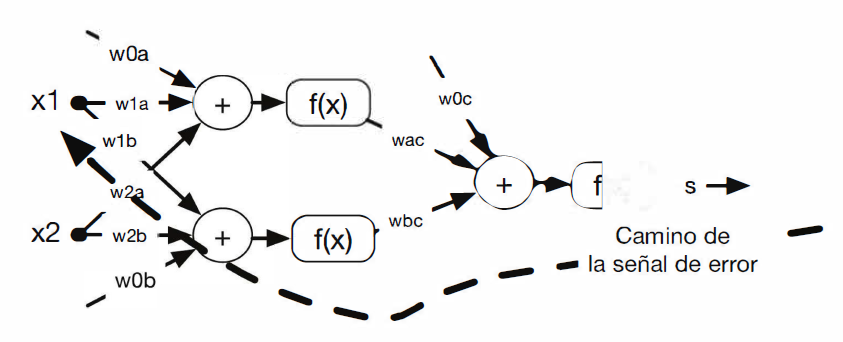


## Descenso de gradiente


Descenso de gradiente (gradient descent) es un algoritmo de optimización que permite minimizar una función haciendo actualizaciones de sus parámetros en la dirección del valor negativo de su gradiente. Aplicado a las redes neuronales, el descenso de gradiente permite ir actualizando los pesos y bías del modelo para reducir su error.

Dado que, calcular el error del modelo para todas las observaciones de entrenamiento, en cada iteración, puede ser computacionalmente muy costoso, existe una alternativa al método de descenso de gradiente llamada gradiente estocástico (stochastic gradient descent, SGD). Este método consiste en dividir el conjunto de entrenamiento en lotes (minibatch o batch) y actualizar los parámetros de la red con cada uno. De esta forma, en lugar de esperar a evaluar todas las observaciones para actualizar los parámetros, se pueden ir actualizando de forma progresiva. Una ronda completa de iteraciones sobre todos los batch se llama época. El número de épocas con las que se entrena una red equivale al número de veces que la red ve cada ejemplo de entrenamiento.


## Preprocesado


A la hora de entrenar modelos basados en redes neuronales, es necesario realizar, al menos, dos tipos de transformaciones de los datos.

Binarización (One hot ecoding) de las variables categóricas

La binarización (one-hot-encoding) consiste en crear nuevas variables dummy con cada uno de los niveles de las variables cualitativas. Por ejemplo, una variable llamada color que contenga los niveles rojo, verde y azul, se convertirá en tres nuevas variables (color_rojo, color_verde, color_azul), todas con el valor 0 excepto la que coincide con la observación, que toma el valor 1.


## Estandarización y escalado de variables numéricas

Cuando los predictores son numéricos, la escala en la que se miden, así como la magnitud de su varianza pueden influir en gran medida en el modelo. Si no se igualan de alguna forma los predictores, aquellos que se midan en una escala mayor o que tengan más varianza dominarán el modelo aunque no sean los que más relación tienen con la variable respuesta. Existen principalmente 2 estrategias para evitarlo:

Centrado: consiste en restarle a cada valor la media del predictor al que pertenece. Si los datos están almacenados en un dataframe, el centrado se consigue restándole a cada valor la media de la columna en la que se encuentra. Como resultado de esta transformación, todos los predictores pasan a tener una media de cero, es decir, los valores se centran en torno al origen.

* Normalización (estandarización): consiste en transformar los datos de forma que todos los predictores estén aproximadamente en la misma escala.

* Normalización Z-score (StandardScaler): dividir cada predictor entre su desviación típica después de haber sido centrado, de esta forma, los datos pasan a tener una distribución normal.

* Estandarización max-min (MinMaxScaler): transformar los datos de forma que estén dentro del rango [0, 1].

* Nunca se deben estandarizar las variables después de ser binarizadas (ver a continuación).


## Hiperparámetros


La gran "flexibilidad" que tienen las redes neuronales es un arma de doble filo. Por un lado, son capaces de generar modelos que aprenden relaciones muy complejas, sin embargo, sufren fácilmente el problema de sobreajuste (overfitting) lo que los incapacita al tratar de prdecir nuevas observaciones. La forma de minimizar este problema y conseguir modelos útiles, pasa por configurar de forma adecuada sus hiperparámetros. Algunos de los más importantes son:

## Número y tamaño de capas


La arquitectura de una red, el número de capas y el número de neuronas que forman parte de cada capa, determinan en gran medida la complejidad del modelo y con ello su potencial capacidad de aprendizaje.

La capa de entrada y salida son sencillas de establecer. La capa de entrada tiene tantas neuronas como predictores y la capa de salida tiene una neurona en problemas de regresión y tantas como clases en problemas de clasificación. En la mayoría de implementaciones, estos valores se establecen automáticamente en función del conjunto de entrenamiento. El usuario suele especificar únicamente el número de capas intermedias (ocultas) y el tamaño de las mismas.

Cuantas más neuronas y capas, mayor la complejidad de las relaciones que puede aprender el modelo. Sin embargo, dado que en cada neurona está conectada por pesos al resto de neuronas de las capas adyacentes, el número de parámetros a aprender aumenta y con ello el tiempo de entrenamiento.


## Learning rate


El learning rate o ratio de aprendizaje establece cómo de rápido pueden cambiar los parámetros de un modelo a medida que se optimiza (aprende). Este hiperparámetro es uno de los más complicados de establecer, ya que depende mucho de los datos e interacciona con el resto de hiperparámetros. Si el learning rate es muy grande, el proceso de optimización puede ir saltando de una región a otra sin que el modelo sea capaz de aprender. Si por el contrario, el learning rate es muy pequeño, el proceso de entrenamiento puede tardar demasiado y no llegar a completarse.Algunas de las recomendaciones heurísticas basadas en prueba y error son:

Utilizar un learning rate lo más pequeño posible siempre y cuando el tiempo de entrenamiento no supere las limitaciones temporales disponibles.

No utilizar un valor constante de learning rate durante todo el proceso de entrenamiento. Por lo general, utilizar valores mayores al inicio y pequeños al final.

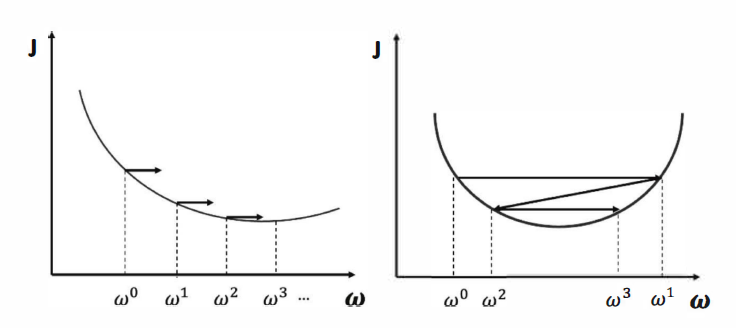

## Algoritmo de optimización


El descenso de gradiente y el descenso de gradiente estocástico fueron de los primeros métodos de optimización utilizados para entrenar modelos de redes neuronales. Ambos utilizan directamente el gradiente para dirigir la optimización. Pronto se vio que esto genera problemas a medida que las redes aumentan de tamaño (neuronas y capas). En muchas regiones del espacio de búsqueda, el gradiente es muy proximo a cero, lo que hace que la optimización quede estancada en estas regiones. Para evitar este problema, se han desarrollado modificaciones del descenso de gradiente capaces de adaptar el learning rate en función del gradiente y subgradiente. De esta forma, el proceso de aprendizaje se ralentiza o acelera dependiendo de las características de la región del espacio de búsqueda en el que se encuentren. Aunque existen multitud de adaptaciones, suele recomendarse:

* Para conjuntos de datos pequeños: l-bfgs

* Para conjuntos de datos grandes: adam o rmsprop
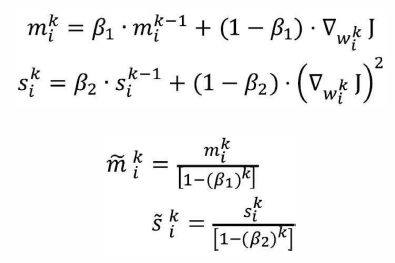

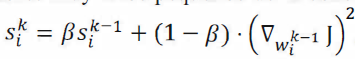

La elección del algoritmo de optimización puede tener un impacto muy grande en el aprendizaje de los modelos, sobretodo en deep learning. Puede encontrarse una excelente descripción más detallada en el libro gratuito Dive into Deep Learning.


## Regularización


Los métodos de regularización se utilizan con el objetivo de reducir el sobreajuste (overfitting) de los modelos. Un modelo con sobreajuste memoriza los datos de entrenamiento pero es incapaz de predecir correctamente nuevas observaciones.

Los modelos de redes neuronales pueden considerarse como modelos sobre parametrizados, por lo tanto, las estrategias de regularización son fundamentales. De entre las muchas que existen, destacan la regularización L1 y L2 (weight decay), y el dropout.

## Penalización L1 y L2

El objetivo de la penalización L1 y L2, esta última también conocida como weight decay, es evitar que los pesos tomen valores excesivamente elevados. De esta forma se evita que unas pocas neuronas dominen el comportamiento de la red y se fuerza a que las características poco informativas (ruido) tengan pesos próximos o iguales a cero.


## Dropout

El proceso consiste en de desactivar aleatoriamente una serie de neuronas durante el proceso de entrenamiento. En concreto, durante cada iteración del entrenamiento, se ponen a cero los pesos de una fracción aleatoria de neuronas por capa. El método de dropout, descrito por Srivastava et al. en 2014, se ha convertido en un estándar para entrenar redes neuronales. El porcentaje de neuronas que suele desactivarse por capa (dropout rate) suele ser un valor entre 0.2 y 0.5.

## Ejemplo

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Modelado
# ==============================================================================
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X

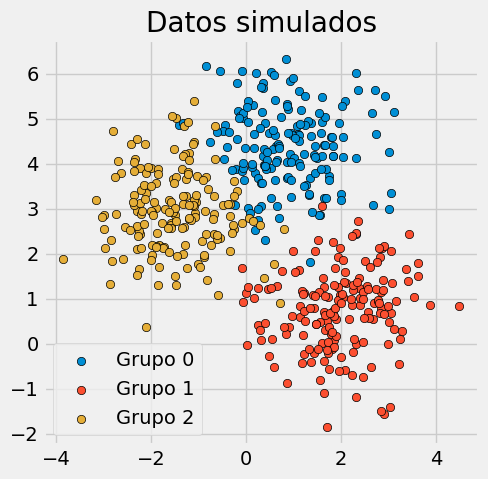

In [2]:
# Datos simulados
# ==============================================================================
X, y = make_blobs(
        n_samples    = 500,
        n_features   = 2,
        centers      = 3,
        cluster_std  = 0.9,
        shuffle      = True,
        random_state = 0
       )

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for i in np.unique(y):
    ax.scatter(
        x = X[y == i, 0],
        y = X[y == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Grupo {i}"
    )

ax.set_title('Datos simulados')
ax.legend();

In [3]:
# Modelos
# ==============================================================================
modelo_1 = MLPClassifier(
                hidden_layer_sizes=(5),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = 123
            )

modelo_2 = MLPClassifier(
                hidden_layer_sizes=(10),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = 123
            )

modelo_3 = MLPClassifier(
                hidden_layer_sizes=(20, 20),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = 123
            )

modelo_4 = MLPClassifier(
                hidden_layer_sizes=(50, 50, 50),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = 123
            )

modelo_1.fit(X=X, y=y)
modelo_2.fit(X=X, y=y)
modelo_3.fit(X=X, y=y)
modelo_4.fit(X=X, y=y)

MLPClassifier(hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01,
              max_iter=5000, random_state=123, solver='lbfgs')

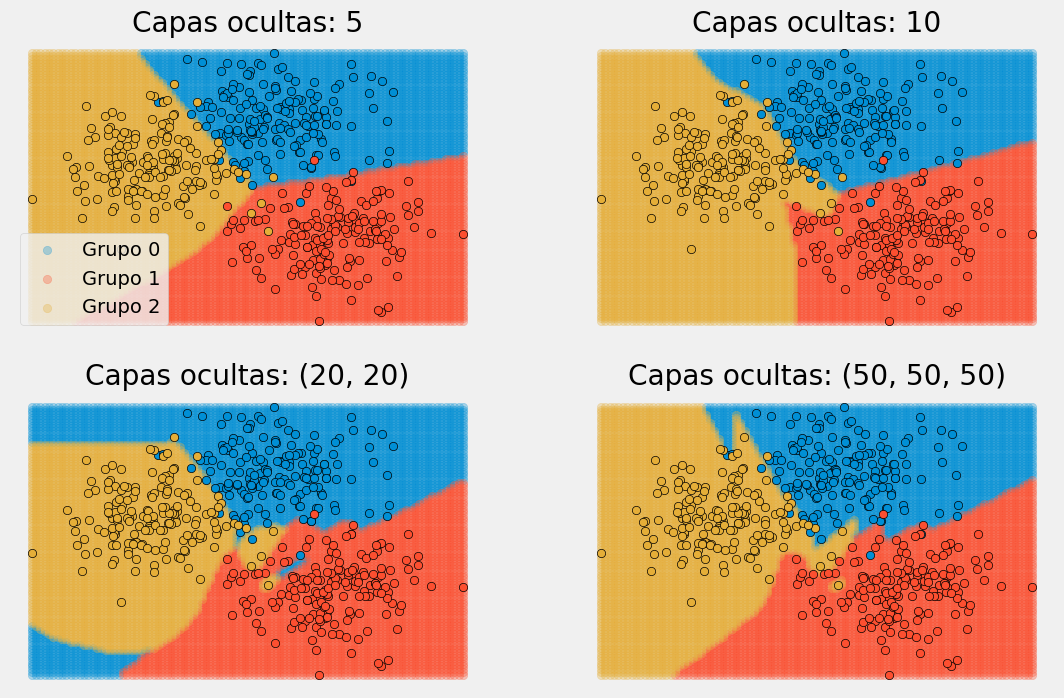

In [4]:
# Gráfico de predicciones
# ==============================================================================
fig, axs = plt.subplots(2, 2, figsize=(12,8))
axs = axs.flatten()
grid_x1 = np.linspace(start=min(X[:, 0]), stop=max(X[:, 0]), num=100)
grid_x2 = np.linspace(start=min(X[:, 1]), stop=max(X[:, 1]), num=100)
xx, yy = np.meshgrid(grid_x1, grid_x2)
X_grid = np.column_stack([xx.flatten(), yy.flatten()])

for i, modelo in enumerate([modelo_1, modelo_2, modelo_3, modelo_4]):

    predicciones = modelo.predict(X_grid)

    for j in np.unique(predicciones):
        axs[i].scatter(
            x = X_grid[predicciones == j, 0],
            y = X_grid[predicciones == j, 1],
            c = plt.rcParams['axes.prop_cycle'].by_key()['color'][j],
            #marker = 'o',
            alpha = 0.3,
            label= f"Grupo {j}"
        )

    for j in np.unique(y):
        axs[i].scatter(
            x = X[y == j, 0],
            y = X[y == j, 1],
            c = plt.rcParams['axes.prop_cycle'].by_key()['color'][j],
            marker    = 'o',
            edgecolor = 'black'
        )

    axs[i].set_title(f"Capas ocultas: {modelo.hidden_layer_sizes}")
    axs[i].axis('off')
axs[0].legend();

## Optimización de hiperparámetros

En este apartado, se muestra cómo afectan al aprendizaje algunos de los hiperparámetros más influyentes. Como los 2 predictores tienen la misma escala, no es estrictamente necesarios aplicarles una normalización previo entrenamiento.

In [5]:
# Número de neuronas
# ==============================================================================
param_grid = {'hidden_layer_sizes':[1, 5, 10, 15, 25, 50, (5,5)]}

grid = GridSearchCV(
        estimator = MLPClassifier(
                        learning_rate_init=0.01,
                        solver = 'lbfgs',
                        alpha  = 0,
                        max_iter = 5000,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

_ = grid.fit(X, y)

KeyboardInterrupt: 

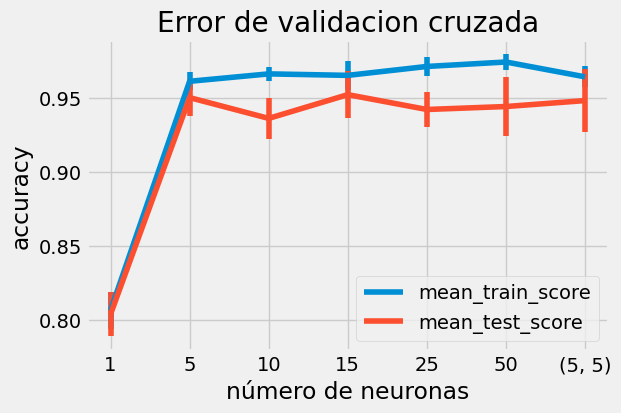

In [25]:
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_hidden_layer_sizes', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_hidden_layer_sizes', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_ylabel('accuracy')
ax.set_xlabel('número de neuronas')
ax.set_title('Error de validacion cruzada');

In [28]:
# learning rate
# ==============================================================================
param_grid = {'learning_rate_init':[0.0001, 0.001, 0.01],#, 0.1, 1, 10, 100],
              'hidden_layer_sizes':[1, 5, 10]}#, 15, 25, 50, (5,5)]}

grid = GridSearchCV(
        estimator = MLPClassifier(
                        #hidden_layer_sizes=(5,5),
                        solver = 'adam',
                        alpha  = 0,
                        max_iter = 5000,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

_ = grid.fit(X, y)

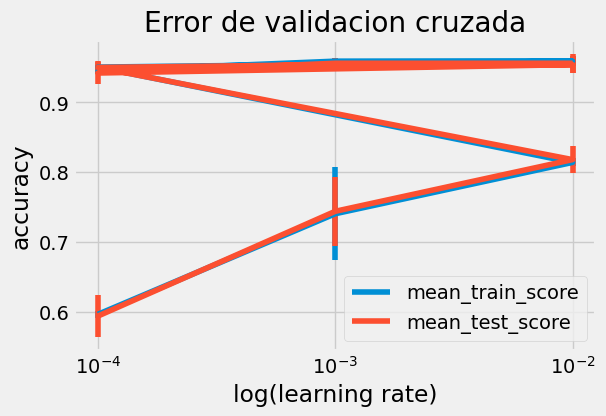

In [29]:
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_learning_rate_init', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_learning_rate_init', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_xscale('log')
ax.set_xlabel('log(learning rate)')
ax.set_ylabel('accuracy')
ax.set_title('Error de validacion cruzada');

In [31]:
np.logspace(-3, 3, 7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [30]:
# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {
    'hidden_layer_sizes': [(10), (10, 10), (20, 20)],
    'alpha': np.logspace(-3, 3, 7),
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = MLPClassifier(solver = 'lbfgs', max_iter= 2000),
        param_distributions = param_distributions,
        n_iter     = 50, # Número máximo de combinaciones probadas
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 3,
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X, y = y)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_learning_rate_init,param_hidden_layer_sizes,param_alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
49,0.100,10,100.00,0.961956,0.017324,0.960991,0.008871
46,0.010,10,100.00,0.961956,0.017324,0.960991,0.008871
7,0.010,"(10, 10)",10.00,0.959984,0.011360,0.960991,0.010713
30,0.010,10,10.00,0.959984,0.011360,0.959990,0.010238
34,0.100,"(10, 10)",10.00,0.959984,0.011360,0.960991,0.010713
21,0.100,"(20, 20)",10.00,0.959984,0.011360,0.960991,0.010713
1,0.001,"(10, 10)",10.00,0.959984,0.011360,0.960991,0.010713
4,0.010,"(20, 20)",10.00,0.959984,0.011360,0.960991,0.010713
14,0.100,10,0.01,0.959972,0.015813,0.965993,0.009929
33,0.100,"(20, 20)",1.00,0.959972,0.015813,0.961992,0.007523


In [32]:
modelo = grid.best_estimator_
modelo

MLPClassifier(alpha=100.0, hidden_layer_sizes=10, learning_rate_init=0.01,
              max_iter=2000, solver='lbfgs')

In [33]:
grid_x1 = np.linspace(start=min(X[:, 0]), stop=max(X[:, 0]), num=100)
grid_x2 = np.linspace(start=min(X[:, 1]), stop=max(X[:, 1]), num=100)
xx, yy = np.meshgrid(grid_x1, grid_x2)

X_grid = np.column_stack([xx.flatten(), yy.flatten()])
predicciones = modelo.predict(X_grid)

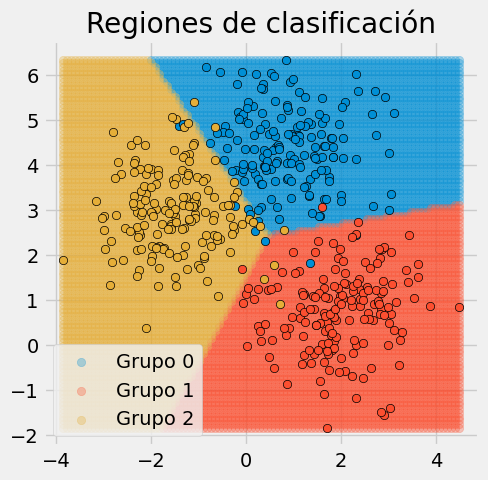

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for i in np.unique(predicciones):
    ax.scatter(
        x = X_grid[predicciones == i, 0],
        y = X_grid[predicciones == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        #marker = 'o',
        alpha = 0.3,
        label= f"Grupo {i}"
    )

for i in np.unique(y):
    ax.scatter(
        x = X[y == i, 0],
        y = X[y == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black'
    )


ax.set_title('Regiones de clasificación')
ax.legend();